In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')
test = pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/test_V2.csv')


# EDA및 전처리

데이터 살펴보기

In [2]:
print("Train data shape:", train.shape)
print("Test data shape:", test.shape)
train.head()

Train data shape: (4446966, 29)
Test data shape: (1934174, 28)


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

각종 id와 matchType만 문자열변수  
나머지는 정수형 변수  
id 속성들은 삭제, matchType는이후에 처리

In [4]:
train.describe()


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,...,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,...,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,...,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


결측치 처리

In [5]:
print("Missing values in train data:\n", train.isnull().sum().sort_values(ascending=False).head(10))
print("Missing values in test data:\n", test.isnull().sum().sort_values(ascending=False).head(10))

Missing values in train data:
 winPlacePerc       1
matchType          0
winPoints          0
weaponsAcquired    0
walkDistance       0
vehicleDestroys    0
teamKills          0
swimDistance       0
roadKills          0
rideDistance       0
dtype: int64
Missing values in test data:
 Id                 0
groupId            0
weaponsAcquired    0
walkDistance       0
vehicleDestroys    0
teamKills          0
swimDistance       0
roadKills          0
rideDistance       0
revives            0
dtype: int64


In [6]:
train = train.dropna(subset=['winPlacePerc'])

In [7]:
print("Missing values in train data:\n", train.isnull().sum().sort_values(ascending=False).head(10))

Missing values in train data:
 Id                 0
matchType          0
winPoints          0
weaponsAcquired    0
walkDistance       0
vehicleDestroys    0
teamKills          0
swimDistance       0
roadKills          0
rideDistance       0
dtype: int64


### 이후 EDA및 전처리에서는 베이스라인 모델의 성능을 기준으로 결정함

### 타깃값의 분포

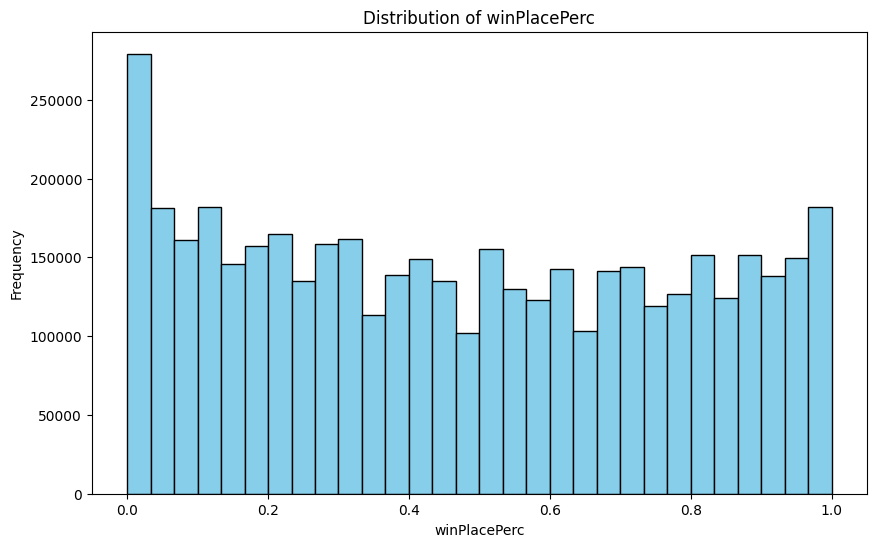

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(train['winPlacePerc'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of winPlacePerc')
plt.xlabel('winPlacePerc')
plt.ylabel('Frequency')
plt.show()


최하위 성적을 기록한 데이터가 많음 [0.1,1.0]의 값들은 상대적으로 균일한 값을 보임

### 3가지 랭크 포인트 변수들 살펴보기

In [ ]:
numeric_train = train.select_dtypes(include=[np.number])

# 세 가지 변수의 분포를 시각화
plt.figure(figsize=(15, 5))

# WinPoints 분포
plt.subplot(1, 3, 1)
plt.hist(numeric_train['winPoints'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of WinPoints")
plt.xlabel("WinPoints")
plt.ylabel("Frequency")

# KillPoints 분포
plt.subplot(1, 3, 2)
plt.hist(numeric_train['killPoints'], bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of KillPoints")
plt.xlabel("KillPoints")
plt.ylabel("Frequency")

# RankPoints 분포
plt.subplot(1, 3, 3)
plt.hist(numeric_train['rankPoints'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Distribution of RankPoints")
plt.xlabel("RankPoints")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

대부분의 플레이어가 point가 0인상태여서 상관계수가 낮게 나옴

### 주요 변수들의 분포 살펴보기

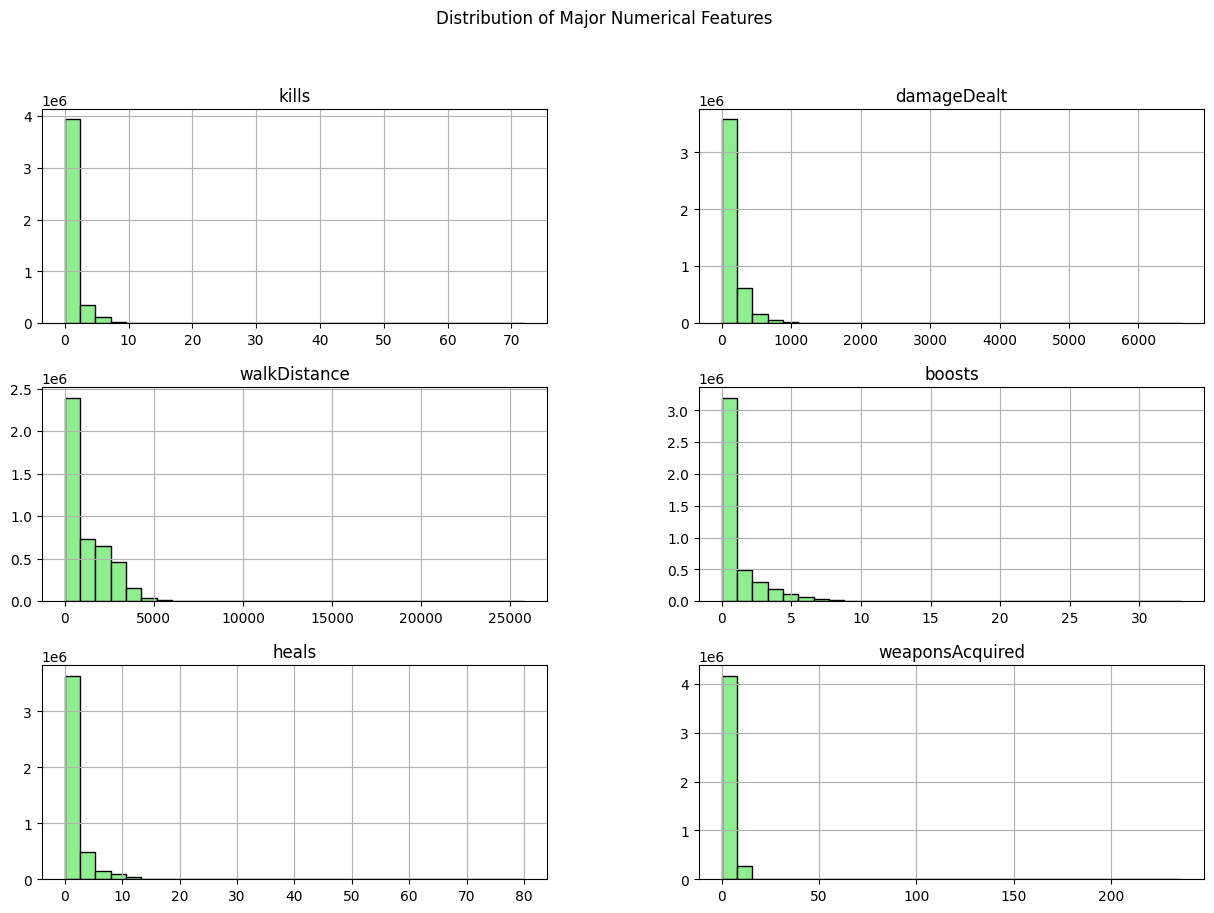

In [10]:
# 주요 수치형 변수 분포 확인
num_columns = ['kills', 'damageDealt', 'walkDistance', 'boosts', 'heals', 'weaponsAcquired']

train[num_columns].hist(bins=30, figsize=(15, 10), color='lightgreen', edgecolor='black')
plt.suptitle('Distribution of Major Numerical Features')
plt.show()


대부분 정규분포 형태를 띄지않고 한쪽으로 치우친 모습

### 매치타입 확인하기

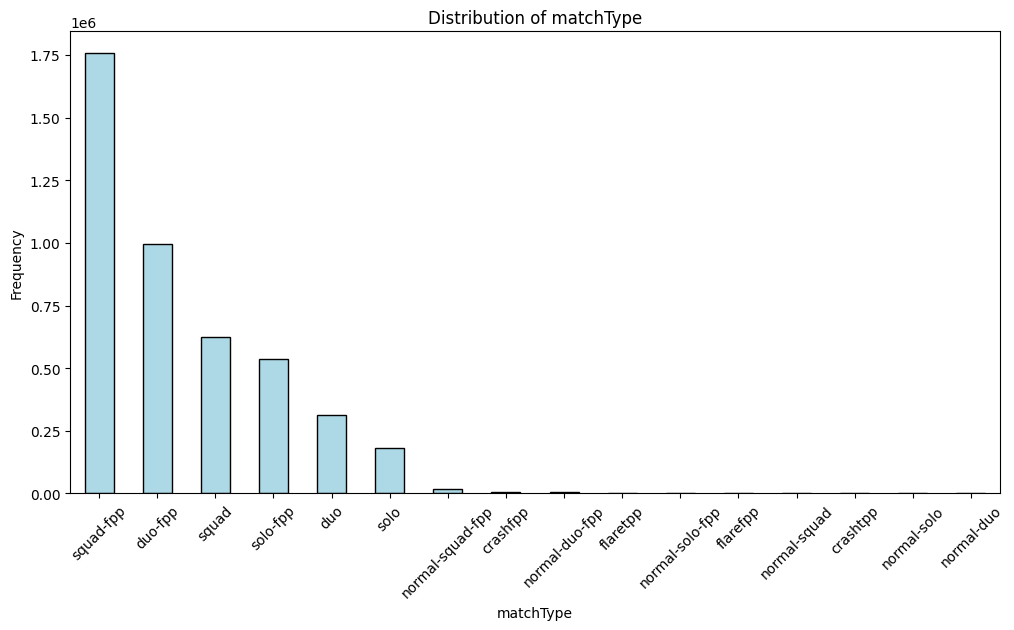

In [11]:
# matchType 분포 확인
plt.figure(figsize=(12, 6))
train['matchType'].value_counts().plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of matchType')
plt.xlabel('matchType')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


FPP(1인칭)와 TPP(3인칭)은 시점의 차이  
solo, duo, squad 의 매치타입으로 이루어져있음  

### 주요변수와 타깃값과의 상관관계

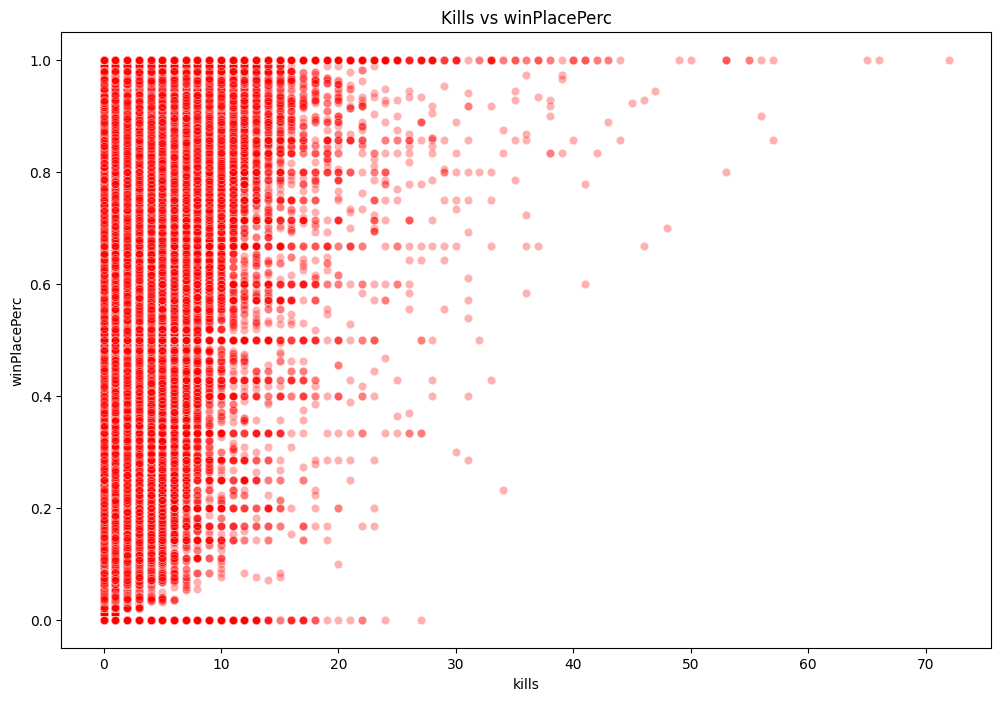

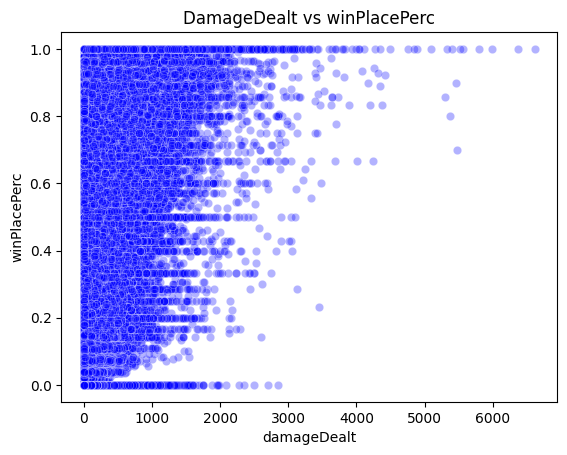

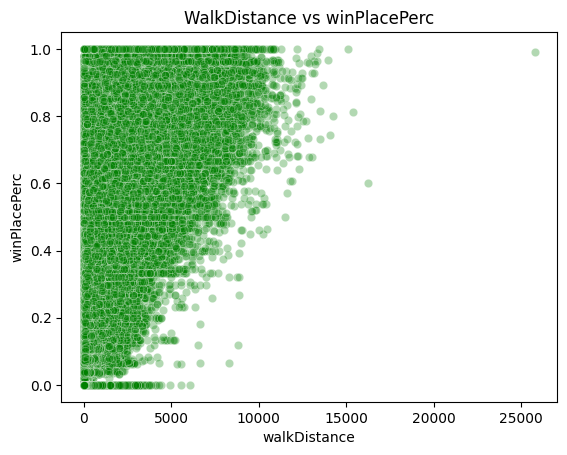

In [12]:
import seaborn as sns

# 주요 성과 변수와 winPlacePerc 간의 상관관계
plt.figure(figsize=(12, 8))
sns.scatterplot(data=train, x='kills', y='winPlacePerc', alpha=0.3, color='red')
plt.title('Kills vs winPlacePerc')
plt.show()

sns.scatterplot(data=train, x='damageDealt', y='winPlacePerc', alpha=0.3, color='blue')
plt.title('DamageDealt vs winPlacePerc')
plt.show()

sns.scatterplot(data=train, x='walkDistance', y='winPlacePerc', alpha=0.3, color='green')
plt.title('WalkDistance vs winPlacePerc')
plt.show()


킬, 이동, 대미지를 넣지않고 높은 순위를 차지하는 경우도 있지만  
각각의 변수가 증가함에따라 타깃변수도 증가하는 추세

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

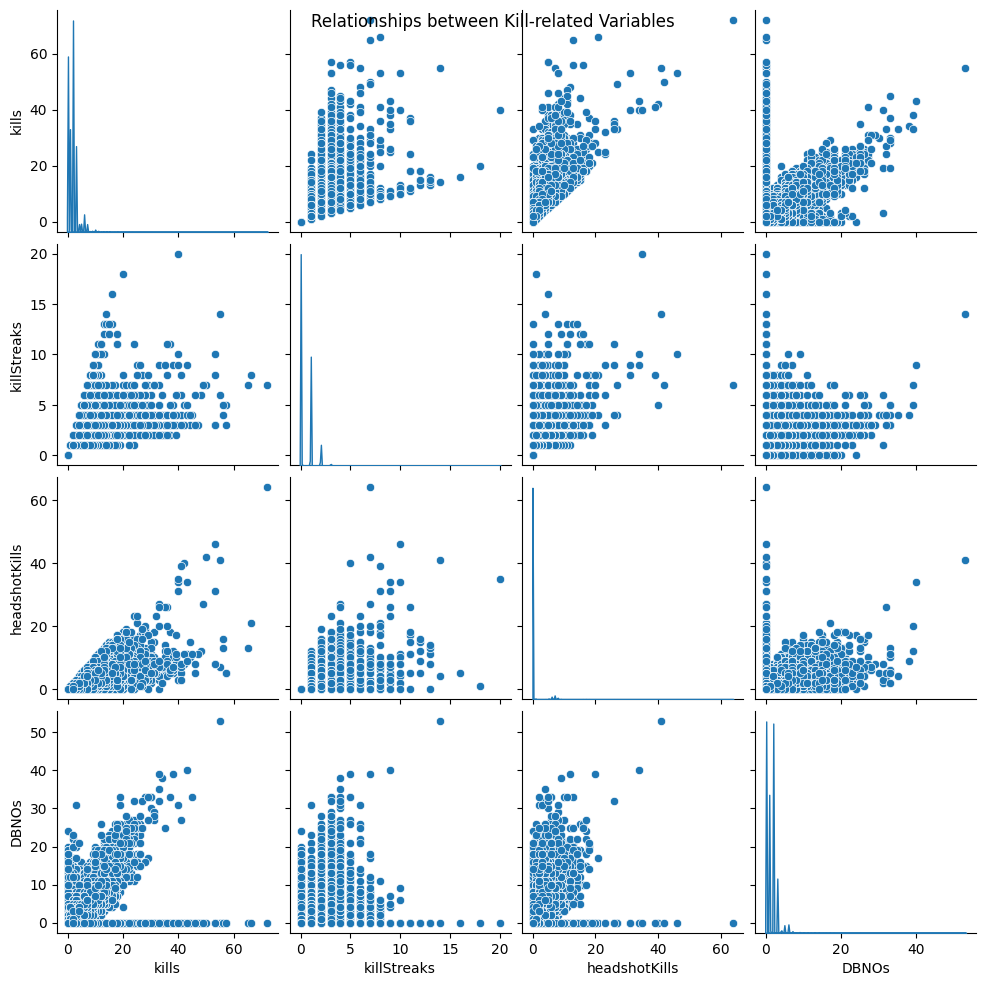

In [13]:
kill_related = ['kills', 'killStreaks', 'headshotKills', 'DBNOs']
sns.pairplot(train[kill_related], diag_kind='kde')
plt.suptitle("Relationships between Kill-related Variables")
plt.show()


기절, 헤드샷킬, 연속킬 역시 킬횟수와 상관관계가 나옴.

### 아이템사용과 타깃값간의 상관관계

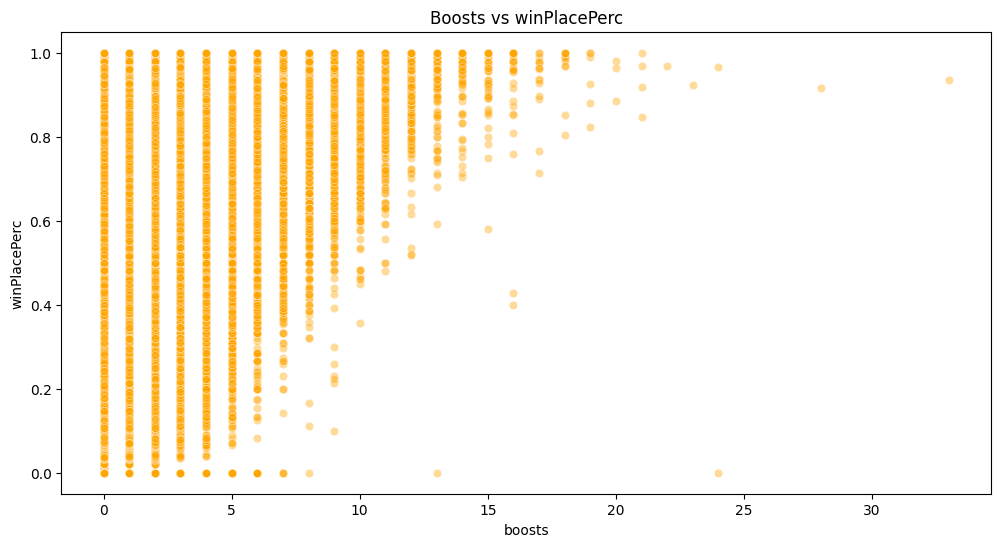

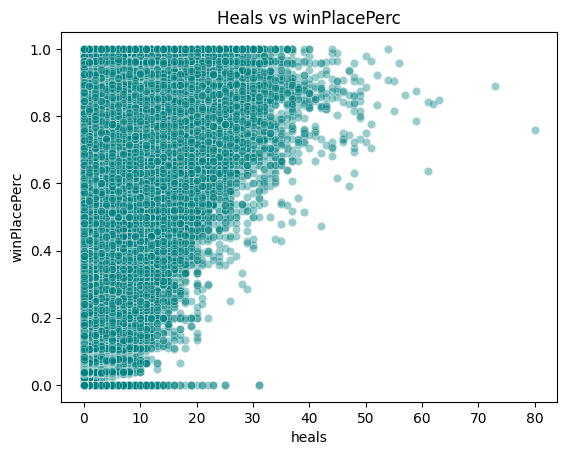

In [14]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train, x='boosts', y='winPlacePerc', alpha=0.4, color='orange')
plt.title('Boosts vs winPlacePerc')
plt.show()

sns.scatterplot(data=train, x='heals', y='winPlacePerc', alpha=0.4, color='teal')
plt.title('Heals vs winPlacePerc')
plt.show()


부스트 아이템과 힐링 아이템 모두 타깃값과 상관관계 존재

### 팀플레이지수와 타깃값간의 상관관계

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

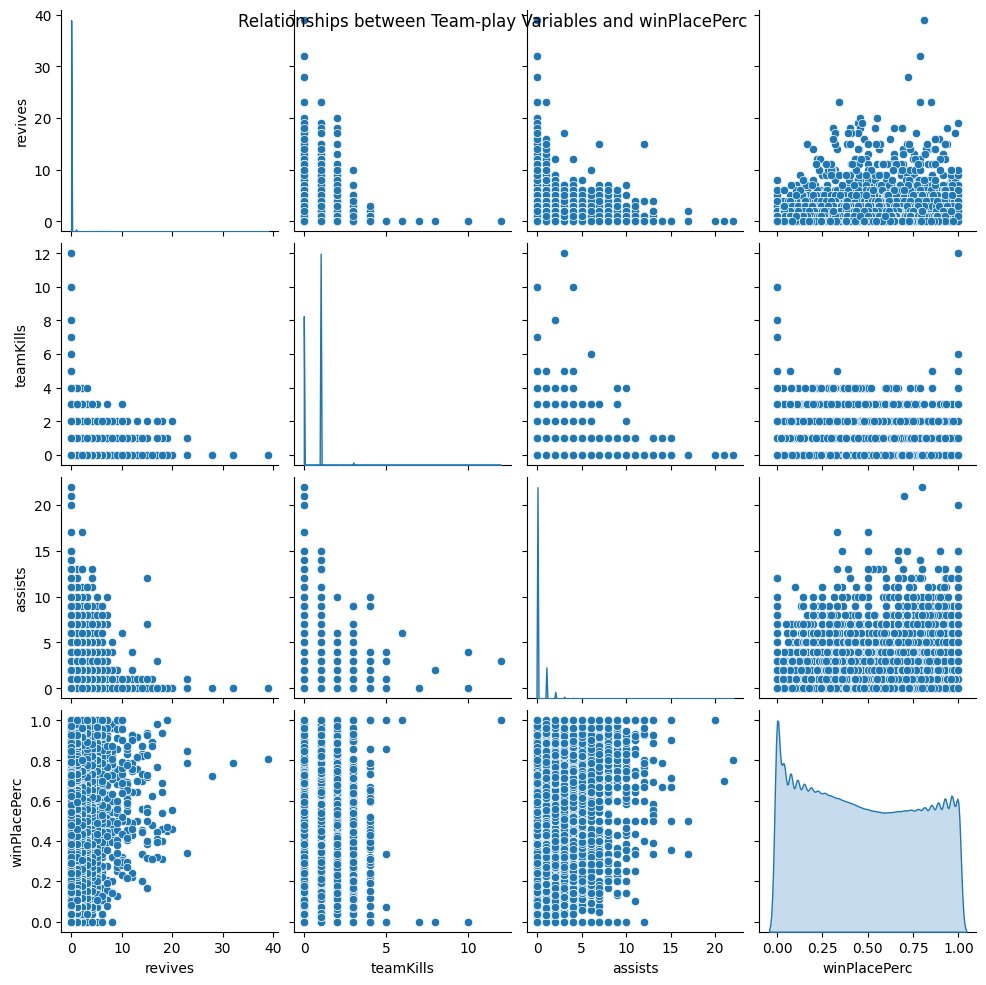

In [15]:
team_related = ['revives', 'teamKills', 'assists', 'winPlacePerc']
sns.pairplot(train[team_related], diag_kind='kde')
plt.suptitle("Relationships between Team-play Variables and winPlacePerc")
plt.show()


부활과 어시스트 속성은 타깃값과 상관관계가 존재해보임  
팀킬 지수는 두드러지는 패턴X  
But, 팀킬 지수와 부활&어시스트 속성은 음의 상관관계 존재 (의도적으로 팀킬하는 플레이어들 존재, 해당 플레이어들은 팀플레이 안하므로 팀플레이 지수는 낮을것)

### 이동지수와 타깃값간의 상관관계

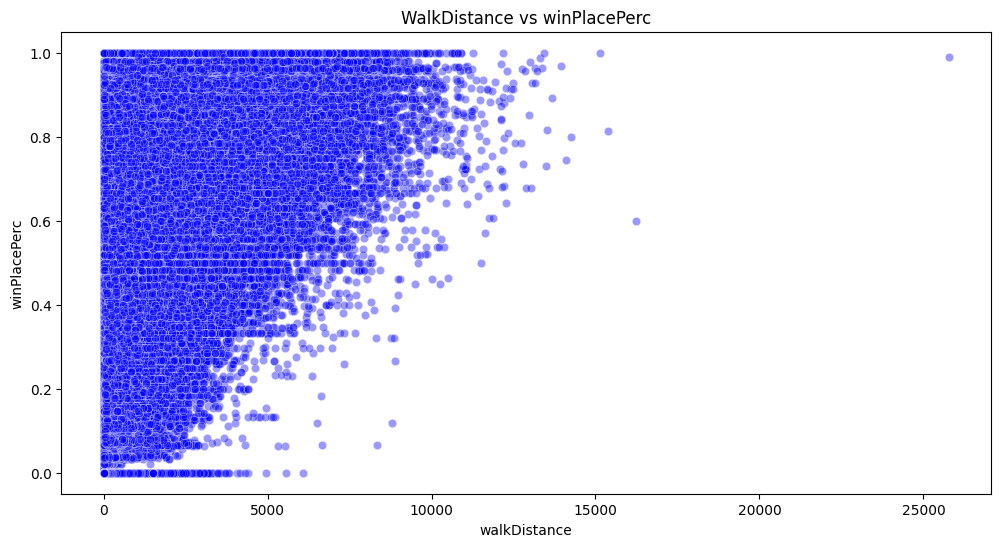

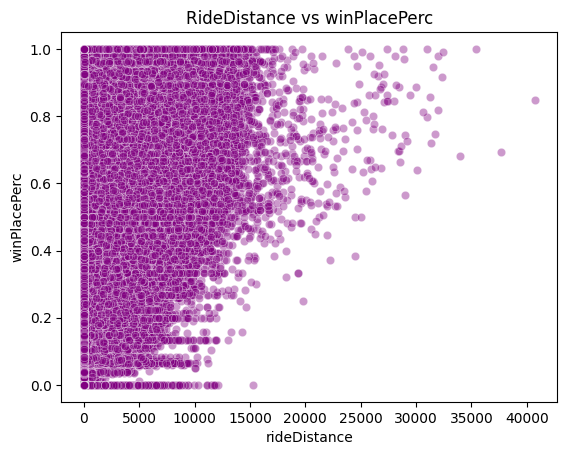

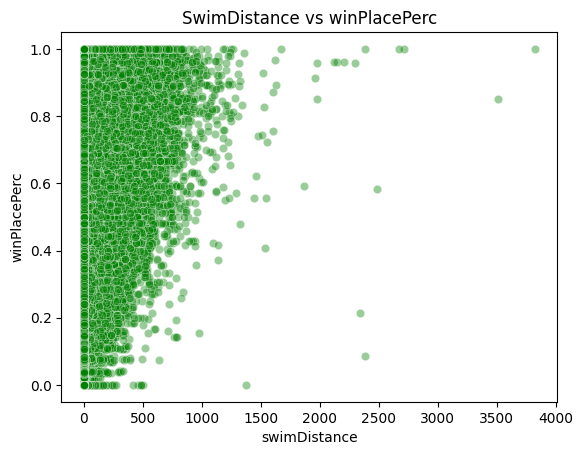

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=train, x='walkDistance', y='winPlacePerc', alpha=0.4, color='blue')
plt.title('WalkDistance vs winPlacePerc')
plt.show()

sns.scatterplot(data=train, x='rideDistance', y='winPlacePerc', alpha=0.4, color='purple')
plt.title('RideDistance vs winPlacePerc')
plt.show()

sns.scatterplot(data=train, x='swimDistance', y='winPlacePerc', alpha=0.4, color='green')
plt.title('SwimDistance vs winPlacePerc')
plt.show()


3가지의 이동 방법모두 패턴을 보임

### 상/하위 그룹별 특징분석

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

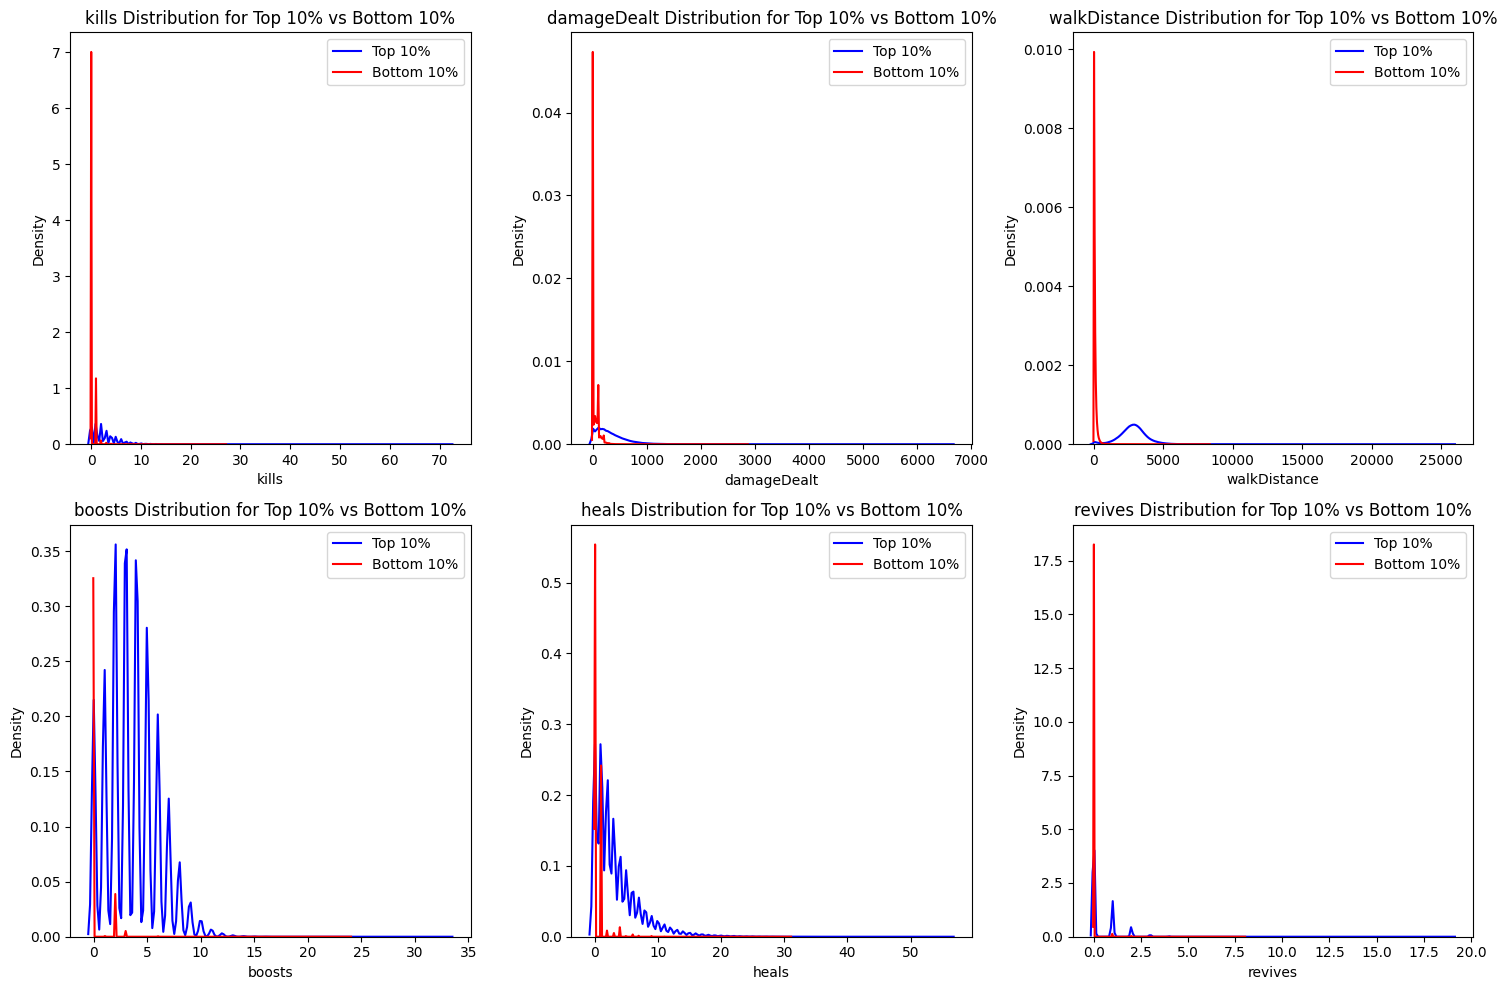

In [16]:
top_10 = train[train['winPlacePerc'] >= 0.9]
bottom_10 = train[train['winPlacePerc'] <= 0.1]

# 상위 10%, 하위 10% 비교
features = ['kills', 'damageDealt', 'walkDistance', 'boosts', 'heals', 'revives']
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, feature in enumerate(features):
    sns.kdeplot(top_10[feature], ax=axes[i//3, i%3], color='blue', label='Top 10%')
    sns.kdeplot(bottom_10[feature], ax=axes[i//3, i%3], color='red', label='Bottom 10%')
    axes[i//3, i%3].set_title(f"{feature} Distribution for Top 10% vs Bottom 10%")
    axes[i//3, i%3].legend()
plt.tight_layout()
plt.show()


하위권의 경우 모든 지수에서 0과 가까운 값을 보임  
상위권의 경우 하위권보다 우측에서 분포를 이룸

### 매치타입별 플레이속성

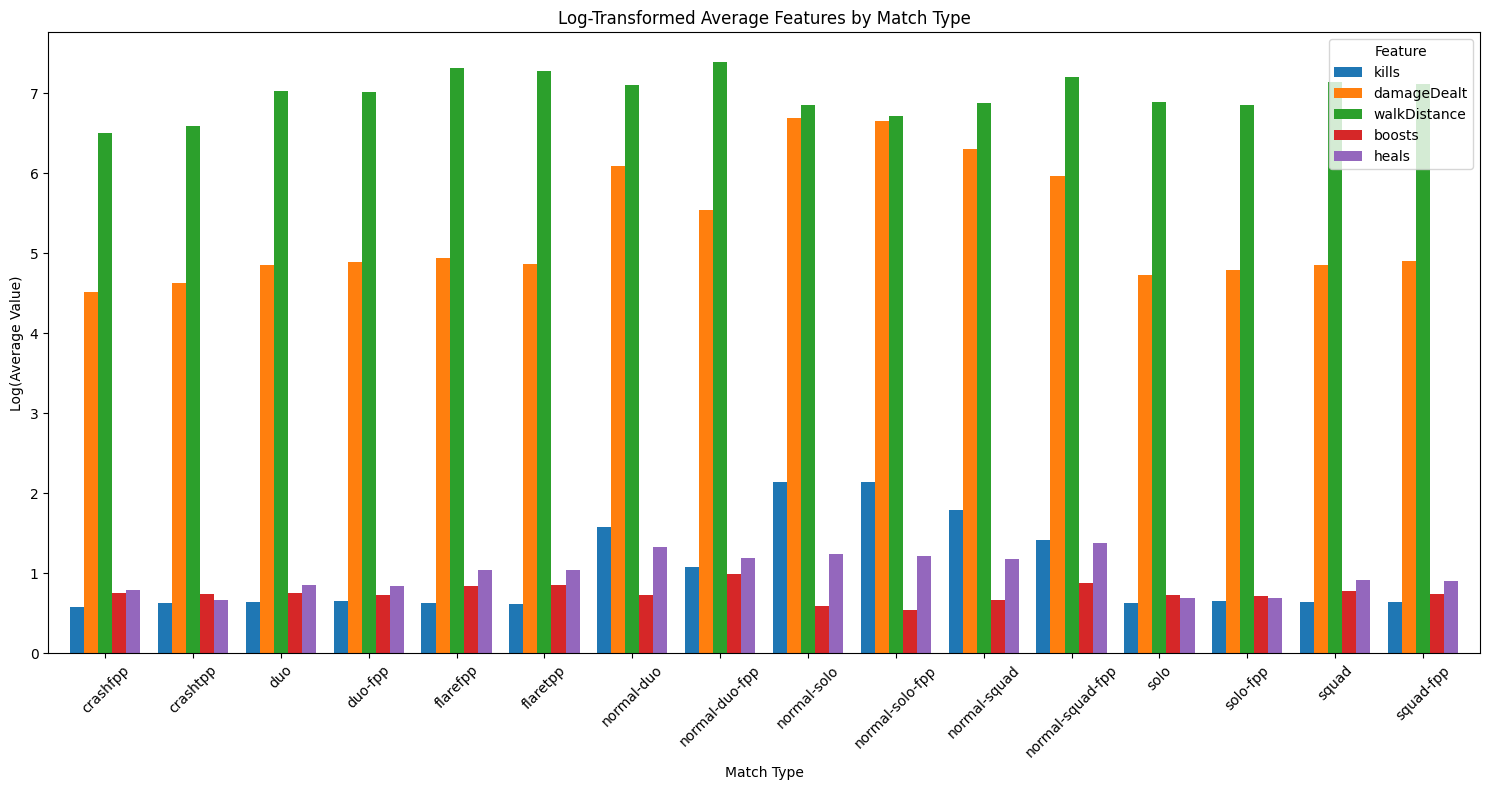

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# 로그 변환하여 평균 계산
match_type_means_log = np.log1p(train.groupby('matchType')[['kills', 'damageDealt', 'walkDistance', 'boosts', 'heals']].mean())

# 시각화
fig, ax = plt.subplots(figsize=(15, 8))

# 각 매치 타입의 평균을 개별 막대로 분리
match_type_means_log.plot(kind='bar', ax=ax, width=0.8)

# 시각적 개선
ax.set_title("Log-Transformed Average Features by Match Type")
ax.set_xlabel("Match Type")
ax.set_ylabel("Log(Average Value)")
ax.legend(title="Feature")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


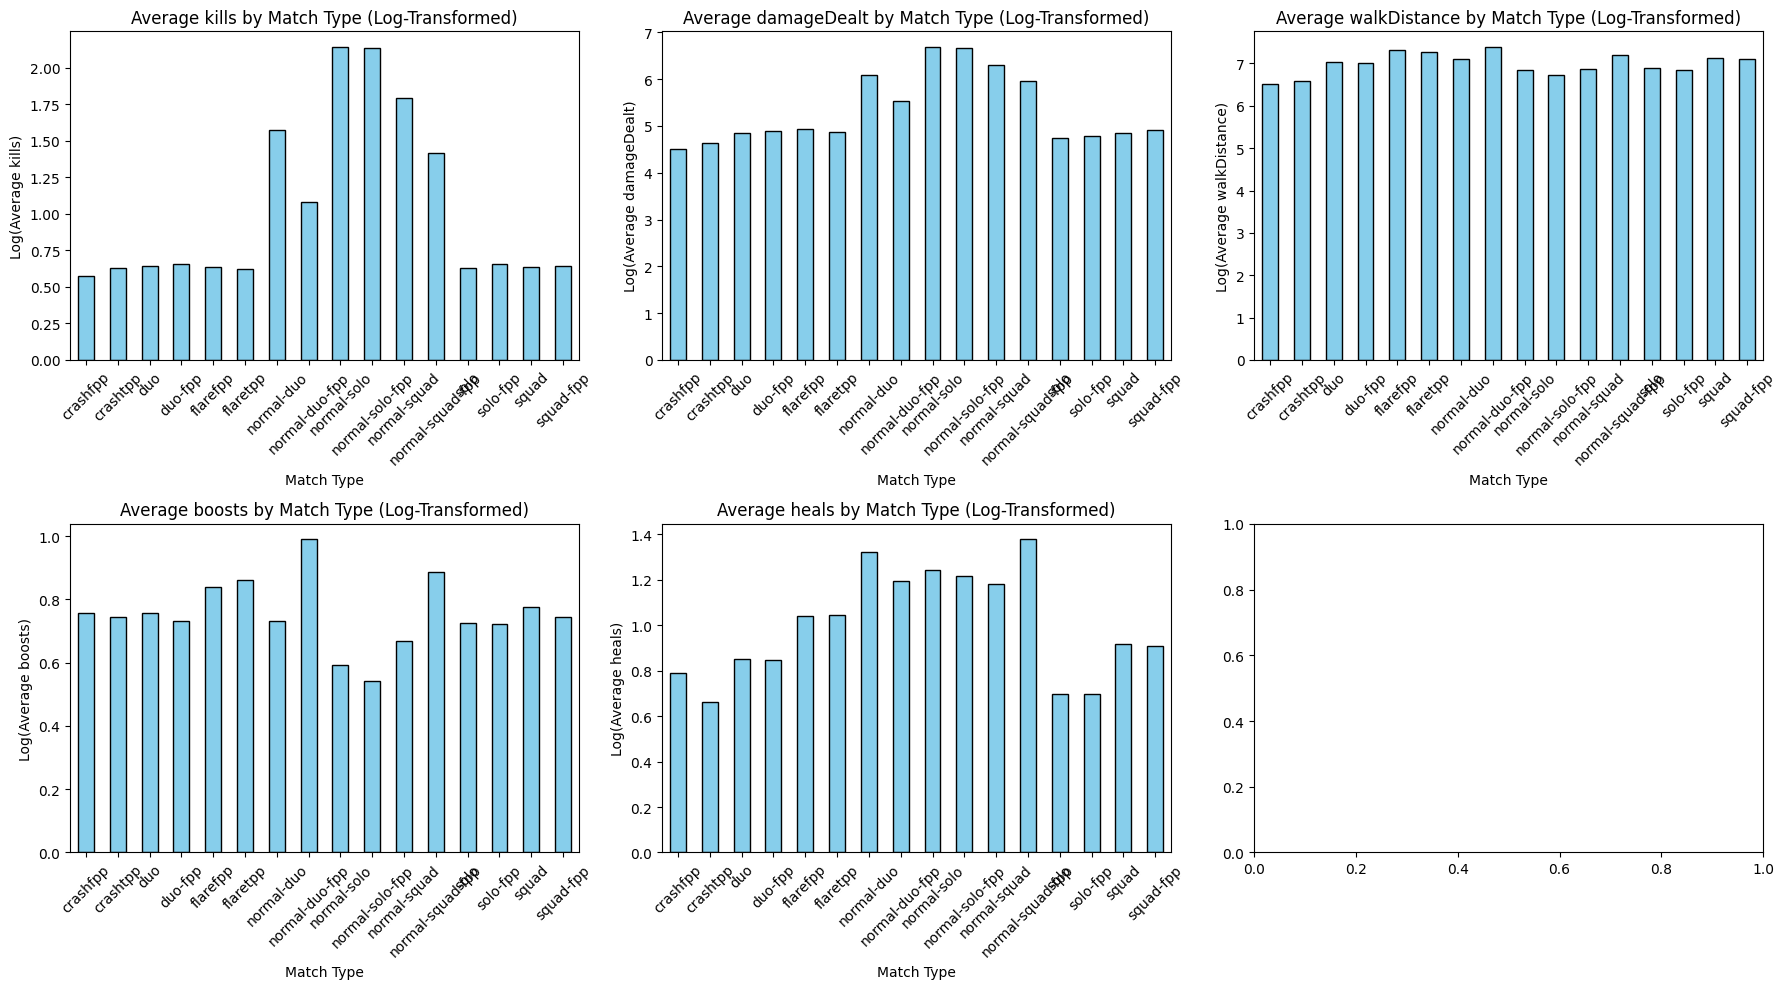

In [23]:
features = ['kills', 'damageDealt', 'walkDistance', 'boosts', 'heals']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(features):
    ax = axes[i // 3, i % 3]
    match_type_means_log[feature].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f"Average {feature} by Match Type (Log-Transformed)")
    ax.set_xlabel("Match Type")
    ax.set_ylabel(f"Log(Average {feature})")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


매치타입별로 다른 속성값은 비슷하게 나타나지만  
킬, 대미지 속성의 경우 차이가남  
-> 매치타입별로 다른 플레이스타일이 나타남 / 다른 전략 수립 필요


# 3. feature engineering & 데이터 전처리

In [ ]:
train['is_zero_winPoints'] = (train['winPoints'] == 0).astype(int)
train['is_zero_killPoints'] = (train['killPoints'] == 0).astype(int)
train['is_zero_rankPoints'] = (train['rankPoints'] == 0).astype(int)


In [ ]:
# 로그 변환 (0을 제외한 나머지 값들만)
train['winPoints_log'] = train['winPoints'].apply(lambda x: np.log1p(x) if x > 0 else 0)
train['killPoints_log'] = train['killPoints'].apply(lambda x: np.log1p(x) if x > 0 else 0)
train['rankPoints_log'] = train['rankPoints'].apply(lambda x: np.log1p(x) if x > 0 else 0)

In [ ]:
# 로그 변환 후 분포 시각화
plt.figure(figsize=(15, 5))

# WinPoints 로그 분포
plt.subplot(1, 3, 1)
plt.hist(train['winPoints_log'], bins=30, color='skyblue', edgecolor='black')
plt.title("Log-Transformed WinPoints Distribution")
plt.xlabel("Log WinPoints")
plt.ylabel("Frequency")

# KillPoints 로그 분포
plt.subplot(1, 3, 2)
plt.hist(train['killPoints_log'], bins=30, color='salmon', edgecolor='black')
plt.title("Log-Transformed KillPoints Distribution")
plt.xlabel("Log KillPoints")
plt.ylabel("Frequency")

# RankPoints 로그 분포
plt.subplot(1, 3, 3)
plt.hist(train['rankPoints_log'], bins=30, color='lightgreen', edgecolor='black')
plt.title("Log-Transformed RankPoints Distribution")
plt.xlabel("Log RankPoints")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

feature engineering 전: 0.1455938048336897  
feature engineering 후: 0.1453942942496193  

-> feature engineering 이후 성능 감소

### killPlace와winPlacePerc의 관계

In [ ]:
# kills가 0인 그룹에서 killPlace와 winPlacePerc의 관계를 시각화
sample_data = train[train['kills'] == 0]

# killPlace와 winPlacePerc의 관계 시각화
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['killPlace'], sample_data['winPlacePerc'], alpha=0.3, color='blue')
plt.title("Relationship between killPlace and winPlacePerc (kills = 0)")
plt.xlabel("killPlace")
plt.ylabel("winPlacePerc")
plt.gca().invert_xaxis()  # killPlace 순서가 낮을수록 높은 순위이므로 축 반전
plt.show()

In [ ]:
train = train.drop(columns=['killPlace'])
train

-> 같은 kill을 기록해도 최종 순위가 높으면 높은 kill순위로 기록됨  
해당 속성은 타깃 데이터가  유출되어 적용되는 속성으로 삭제 처리


### Match Type별로 데이터 구분하여 학습 진행하기  
solo, duo, squad는 플레이 특성이 다르기 때문에 다른 데이터로 분류


In [ ]:
plt.figure(figsize=(10, 6))
train['matchType'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Match Types")
plt.xlabel("Match Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 상위 6개의 matchType 항목을 가진 데이터만 남기기
top_6_match_types_list = train['matchType'].value_counts().nlargest(6).index
train_top_6_match_types = train[train['matchType'].isin(top_6_match_types_list)]

# 결과 확인
print(train_top_6_match_types['matchType'].value_counts())

### 팀원 멤버의수 속성추가

In [ ]:
train['team_size'] = train.groupby(['matchId', 'groupId'])['Id'].transform('count')

# 같은 팀에 속한 팀원 수 확인
train[['matchId', 'groupId', 'Id', 'team_size']].drop_duplicates().head(10)

속성 추가 전: 0.1487116553644863  
속성 추가 후: 0.1455938048336897  
-> 속성 추가 후 성능 향상

In [ ]:
train = train.drop(columns=['Id', 'groupId', 'matchId'])
train

In [ ]:
#데이터 전처리 과정이 남았기에 마지막에 분리 진행

# Solo 데이터
solo_types = ['solo', 'solo-fpp']
solo_train = train[train['matchType'].isin(solo_types)]

# Duo 데이터
duo_types = ['duo', 'duo-fpp']
duo_train = train[train['matchType'].isin(duo_types)]

# Squad 데이터
squad_types = ['squad', 'squad-fpp']
squad_train = train[train['matchType'].isin(squad_types)]

# 결과 확인
print("Solo 데이터 개수:", len(solo_train))
print("Duo 데이터 개수:", len(duo_train))
print("Squad 데이터 개수:", len(squad_train))

# Solo 테스트 데이터 (matchType에 'solo' 포함)
solo_test = test[test['matchType'].str.contains('solo')]

# Duo 테스트 데이터 (matchType에 'duo' 포함)
duo_test = test[test['matchType'].str.contains('duo')]

# Squad 테스트 데이터 (solo, duo에 포함되지 않는 나머지)
squad_test = test[~test['matchType'].str.contains('solo|duo')]

# 결과 확인
print("Solo 테스트 데이터 개수:", len(solo_test))
print("Duo 테스트 데이터 개수:", len(duo_test))
print("Squad 테스트 데이터 개수:", len(squad_test))

In [ ]:
#타입 안나누는 버전
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['matchType'] = label_encoder.fit_transform(train['matchType'])

타입 안나눔 RMSE: 0.1490401470357867  
타입 나눔 RMSE: 0.1453942942496193



In [ ]:
duo_train

타깃값과의 상관관계분석

In [ ]:
# 숫자형 열만 선택
numeric_train = train.select_dtypes(include=[np.number])

# 타깃 변수 'winPlacePerc'와 나머지 숫자형 변수 간의 상관관계 계산
target_corr = numeric_train.corr()['winPlacePerc'].sort_values(ascending=False)

# 결과 출력
target_corr

In [ ]:
# 숫자형 열만 선택
numeric_train = train.select_dtypes(include=[np.number])

# 타깃 변수 'winPlacePerc'와 나머지 숫자형 변수 간의 상관관계 계산
target_corr = numeric_train.corr()['winPlacePerc'].sort_values(ascending=False)

# 타깃 변수 자신과의 상관관계 제외
target_corr_df = target_corr.drop('winPlacePerc')

# 시각화
plt.figure(figsize=(10, 8))
target_corr_df.plot(kind='barh', color='skyblue')
plt.title("Correlation of winPlacePerc with Other Features")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # 가장 상관관계가 높은 변수를 위에 두기 위해 축 반전
plt.show()

In [ ]:
low_corr_columns = target_corr[abs(target_corr) < 0.05].index
train = train.drop(columns=low_corr_columns)

# 삭제된 열 목록 확인
print("삭제된 열:", low_corr_columns)
print("남은 열:", train.columns)

모든 속성 포함: Weighted RMSE across all match types: 0.1453942942496193  상관계수 |0.05|이상 속성만 포함:                       0.15374351626653926  
-> 모든 속성 포함



killPlace: 매치내 킬 기반 순위이기에 (-)방향으로 상관관계 나타남  
matchDuration: 해당 매치의 지속시간 (플레이어와 무관)  
3개의 points속성: 해당플레이어에게 부여된 점수  
winpoints: 승리기반의 외부 점수
killpoints: 킬수 기반의 외부 점수  
rankpoints: 승리+킬수 기반의 외부점수


walkDistance가 가장 강한 상관관게를 보임 -> 숨어서 다른 생존자들이 탈락하길 기다리는 전략보다, 적극적으로 움직이는 전략이 좋음  
boosts, weaponsacquires 역시 강한 상관관계를 보임 -> 적극적으로 움직이며 아이템을 얻는 것이 좋음


결측치 제거  
KillPlace 속성 삭제  
MatchTypr별로 데이터 분리  
팀 멤버수 속성 추가


# 2. 베이스 라인 모델

모든 매치타입 한번에 입력 

In [ ]:
from sklearn.model_selection import train_test_split


X = train.drop(columns=['winPlacePerc'])
y = train['winPlacePerc']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형 회귀 모델 학습
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 검증 세트 예측 및 평가 (RMSE 계산)
y_pred = lin_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Baseline Linear Regression RMSE:", rmse)


매치타입별 학습

In [ ]:
def calculate_weighted_rmse(y_true_solo, y_pred_solo, y_true_duo, y_pred_duo, y_true_squad, y_pred_squad):
    # 각 검증 세트의 RMSE 계산
    rmse_solo = mean_squared_error(y_true_solo, y_pred_solo, squared=False)
    rmse_duo = mean_squared_error(y_true_duo, y_pred_duo, squared=False)
    rmse_squad = mean_squared_error(y_true_squad, y_pred_squad, squared=False)
    
    # 각 매치타입 검증 세트의 크기 계산
    n_solo = len(y_true_solo)
    n_duo = len(y_true_duo)
    n_squad = len(y_true_squad)
    total_n = n_solo + n_duo + n_squad

    # 가중 평균 RMSE 계산
    weighted_rmse = (rmse_solo * n_solo + rmse_duo * n_duo + rmse_squad * n_squad) / total_n
    return weighted_rmse

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_solo = solo_train.drop(columns=['winPlacePerc', 'matchType'])
y_solo = solo_train['winPlacePerc']
X_duo = duo_train.drop(columns=['winPlacePerc', 'matchType'])
y_duo = duo_train['winPlacePerc']
X_squad = squad_train.drop(columns=['winPlacePerc', 'matchType'])
y_squad = squad_train['winPlacePerc']

# Solo 검증 세트
X_solo_train, X_solo_val, y_solo_train, y_solo_val = train_test_split(X_solo, y_solo, test_size=0.2, random_state=42)
solo_model = LinearRegression()
solo_model.fit(X_solo_train, y_solo_train)
y_solo_val_pred = solo_model.predict(X_solo_val)

# Duo 검증 세트
X_duo_train, X_duo_val, y_duo_train, y_duo_val = train_test_split(X_duo, y_duo, test_size=0.2, random_state=42)
duo_model = LinearRegression()
duo_model.fit(X_duo_train, y_duo_train)
y_duo_val_pred = duo_model.predict(X_duo_val)

# Squad 검증 세트
X_squad_train, X_squad_val, y_squad_train, y_squad_val = train_test_split(X_squad, y_squad, test_size=0.2, random_state=42)
squad_model = LinearRegression()
squad_model.fit(X_squad_train, y_squad_train)
y_squad_val_pred = squad_model.predict(X_squad_val)

# 가중 평균 RMSE 계산 함수 호출
weighted_rmse = calculate_weighted_rmse(y_solo_val, y_solo_val_pred, y_duo_val, y_duo_val_pred, y_squad_val, y_squad_val_pred)
print("Weighted RMSE across all match types:", weighted_rmse)


